In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [2]:
%matplotlib inline
df = pd.read_csv('data_assignment.csv')

# Which city has the most jobs? How many jobs each type (casual, fulltime, etc.) are there in each city?

In [ ]:
city_most_jobs = df['Location'].value_counts()
city_most_jobs


In [ ]:
city_by_job_type = df.groupby(['Location', 'JobType']).size()
city_by_job_type


In [ ]:
locations = df['Location'].unique()
top_5 = ''
for location in locations:
    location_frame = df[(df['Location'] == location)]
    top_5 = location_frame['Classification'].value_counts().nlargest(5)
top_5
    

In [ ]:
for location in locations:
    top_5_classification = df[(df['Location'] == location)]['Classification'].value_counts().nlargest(5)

    labels = top_5_classification.index.tolist()
    
    fig = plt.figure()
    ax = fig.add_axes([1, 1, 1, 1])
    ax.axis('equal')
    languages = labels
    ax.pie(top_5_classification, labels=languages, autopct='%1.2f%%')
    plt.title(location)
    plt.show()


In [ ]:
# Which city is more well-paid?
# Which City is most well paid??????????????????
# Which City is paid the most on average??

city_by_salary_range = df.groupby(['Location', 'LowestSalary', 'HighestSalary']).size()
city_by_salary_range


In [ ]:
for location in locations:
    location_df = df[(df['Location'] == location)]
    top_companies = location_df['Company'].value_counts().nlargest(5).index.tolist()
    print(location)
    for index, row in location_df.iterrows():
        if row['Company'] in top_companies:
            print(f"{row['Company']} | {row['Classification']}")
            top_companies.remove(row['Company'])
    print('\n')


In [ ]:
brisbane_df = df[(df['Location'] == 'Brisbane')]
sydney_df = df[(df['Location'] == 'Sydney')]

In [ ]:
#2. Analyse by time. (7 points)

In [16]:
#Visualise the number of job posts by month. (1 point)

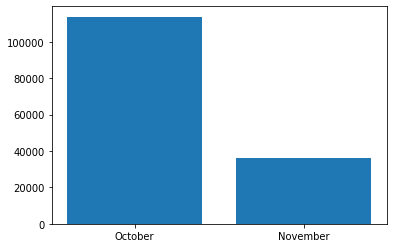

In [29]:
month_count = {}  

for index, col in df.iterrows(): 
    month = col['Date'].split('-')[1]
    
    if month in month_count:
        month_count[month] += 1
    else:
        month_count[month] = 1

months = ['October','November']
plt.bar(range(len(month_count)),month_count.values(),tick_label=months)
plt.show()

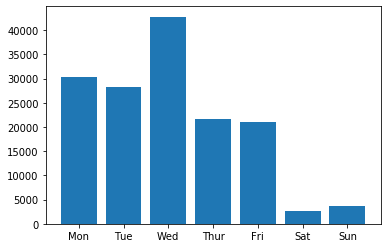

In [59]:
#Visualise the number of job posts by day of week
from datetime import datetime


def fix_date(date):
    return date[:10]

df['Date'] = df['Date'].apply(fix_date)


day_count = {}  

for index, col in df.iterrows(): 
    year = int(col['Date'].split('-')[0])
    month = int(col['Date'].split('-')[1])
    day = int(col['Date'].split('-')[2])
    
    week_day = datetime(year, month, day).strftime('%A')

    if week_day in day_count:
        day_count[week_day] += 1
    else:
        day_count[week_day] = 1
        


days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
day_values = [day_count['Monday'],day_count['Tuesday'],day_count['Wednesday'],day_count['Thursday'],day_count['Friday'],day_count['Saturday'],day_count['Sunday']]

plt.bar(range(len(days)),day_values,tick_label=days)
plt.show()


<BarContainer object of 31 artists>

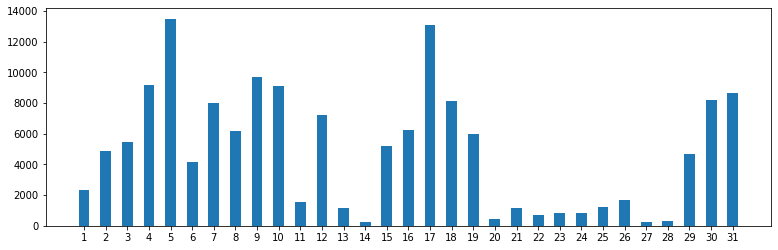

In [81]:
#Visualise the number of job posts by day of the month.
month_date = {}  

for index, col in df.iterrows(): 
    day = int(col['Date'].split('-')[2])
    
    if day in month_date:
        month_date[day] += 1
    else:
        month_date[day] = 1

sorted_month_date = dict(sorted(month_date.items()))
month_days = list(data.keys())


plt.figure(figsize=(13, 4))  
plt.bar(range(len(sorted_month_date)), sorted_month_date.values(),tick_label=month_days, width=0.5)

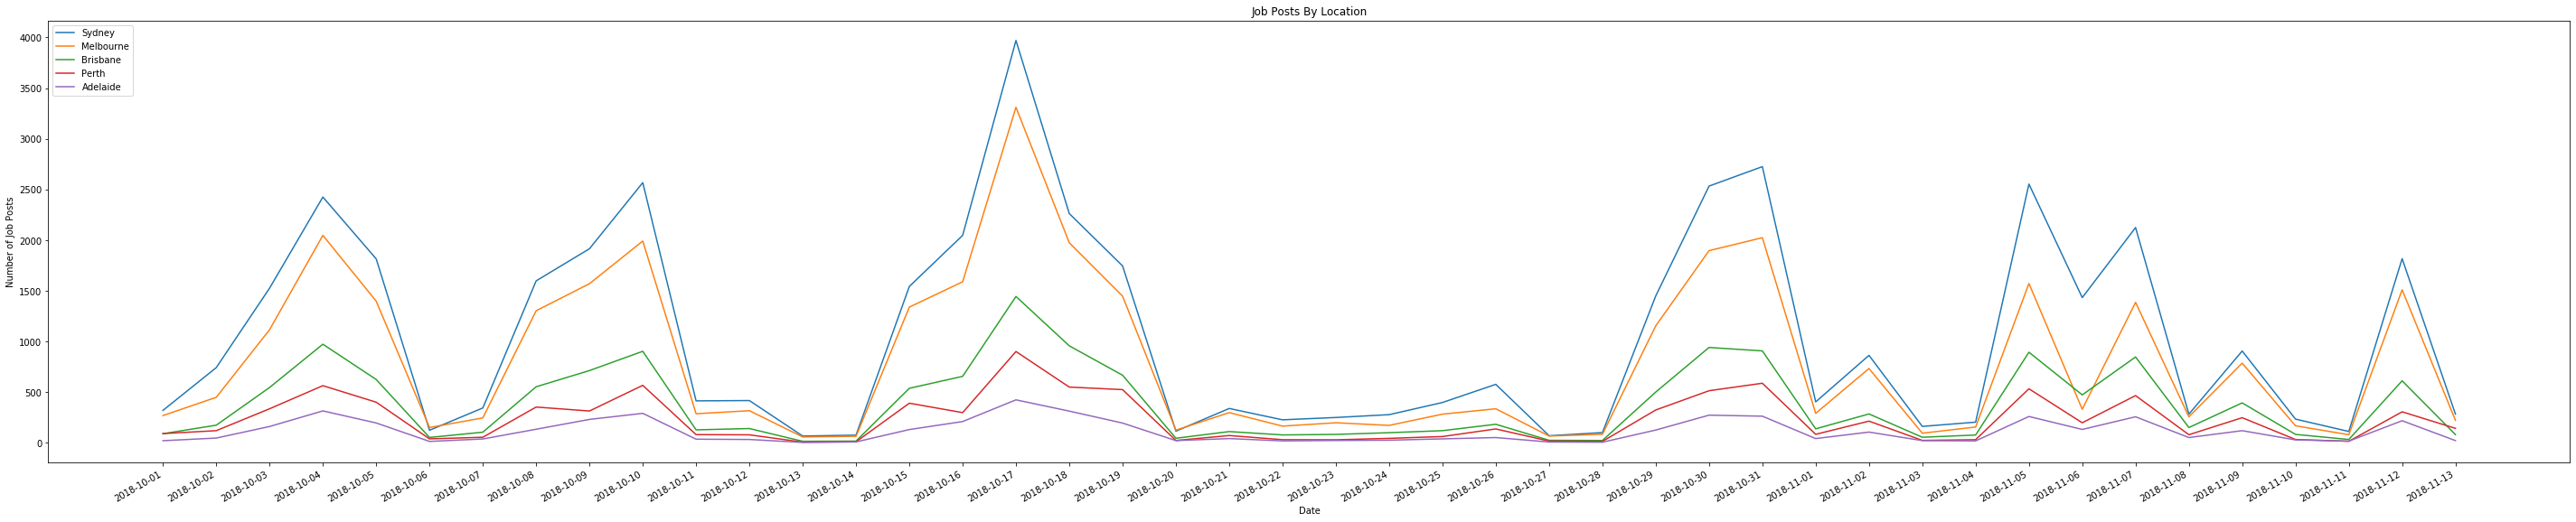

In [129]:
#Visualise trending of the job postings for the big cities.

dates = df['Date'].unique()
dates.sort()


sydney = df[(df['Location'] == 'Sydney')]
sydneyPostings = []

melbourne = df[(df['Location'] == 'Melbourne')]
melbournePostings = []

brisbane = df[(df['Location'] == 'Brisbane')]
brisbanePostings = []

perth = df[(df['Location'] == 'Perth')]
perthPostings = []

adelaide = df[(df['Location'] == 'Adelaide')]
adelaidePostings = []

for day in dates:
    sydneyPostings.append(len(sydney[(sydney['Date'] == day)]))
    melbournePostings.append(len(melbourne[(melbourne['Date'] == day)]))
    brisbanePostings.append(len(brisbane[(brisbane['Date'] == day)]))
    perthPostings.append(len(perth[(perth['Date'] == day)]))
    adelaidePostings.append(len(adelaide[(adelaide['Date'] == day)]))
    
    
    
plt.figure(figsize=(50, 10))  

plt.plot(dates, sydneyPostings,label="Sydney")
plt.plot(dates, melbournePostings,label="Melbourne")
plt.plot(dates, brisbanePostings,label="Brisbane")
plt.plot(dates, perthPostings,label="Perth")
plt.plot(dates, adelaidePostings,label="Adelaide")

plt.title('Job Posts By Location')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.savefig("sample.jpg", dpi=1200)

plt.show()


In [ ]:
#Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion. 